# Homework 4 - [Fourier analysis](https://colab.research.google.com/drive/1Zpfe522IeZVgKQBzLx6h--YIVYJMbYkm?usp=sharing)

Due date: May - 18

Student: Carlos Antunis Bonfim da Silva Santos ([crlsantnys@gmail.com](mailto:crlsantnys@gmail.com))

In [1]:
using FFTW
using Plots

x_0, x_f = -pi, +pi;
X = [x_0 + dx for dx in 0:.1:(x_f - x_0)];

## Exercise 1.

### item a.

Since the function is odd $a_n = 0$, then evaluating the other coordinates:

$$
  b_n = \frac{2}{\pi}\int_{0}^{+\pi} xsin(nx) dx = -2xcos(nx)/(n\pi)|_{0}^{+\pi} - \frac{2}{\pi}\int_{0}^{+\pi} cos(nx)/n dx = (-1)^{n + 1}\frac{2}{n}\text{,}
$$

thus, $x = \sum_n (-1)^{n + 1} 2 sin(nx) / n$.

### item b.

Using the Parseval's relation:

$$
  \sum_n 1/n^2 = 1/4 \sum_n 4/n^2 = 1/4 \sum_n ((-1)^{n + 1} 2 / n)^2 = \frac{1}{4\pi}\int_{-\pi}^{+\pi} x^2 dx = \frac{1}{2\pi}\int_{0}^{+\pi} x^2 dx = \frac{1}{2\pi}x^3 / 3 |_0^\pi = \frac{\pi^2}{6}\text{.}
$$

## Exercise 2.

### item a.

Using the complex Fourier series:

$$
  exp(sx) = \sum_{n = -\infty}^{+\infty} c_n exp(+inx)\text{,}
$$

in which

$$
  c_n = \int_{-\pi}^{+\pi} exp(-inx)exp(sx) dx / 2\pi =\\ \int_{-\pi}^{+\pi} exp((s - in)x) dx / 2\pi =\\ exp((s - in) x) / 2\pi(s - in) |_{-\pi}^{+\pi} =\\ (-1)^n\frac{sinh(s\pi)}{\pi (s - in)} \text{,}
$$

thus $exp(sx) = \sum_{n = -\infty}^{+\infty} (-1)^n\frac{sinh(s\pi)}{\pi (s - in)} exp(+inx)$.

### item b.

Using parseval's relation:

$$
  \frac{1}{2\pi s} sinh(2s\pi) = \frac{1}{2\pi} \int_{-\pi}^{+\pi} exp(2sx) dx = \sum_{n = - \infty}^{+\infty} \frac{sinh(sx)^2}{\pi^2|s - in|^2} =\\ \sum_{n = - \infty}^{+\infty} \frac{sinh(sx)^2}{\pi^2|s - in|^2} =\\ \frac{sinh(sx)^2}{\pi^2}\sum_{n = - \infty}^{+\infty} \frac{1}{(s^2 + n^2)}\text{,}
$$

using $sinh(2x) = 2 sinh(x) cosh(x)$, we can obtain

$$
\sum_{n = -\infty}^{+\infty} \frac{1}{s^2 + n^2}= \frac{\pi}{s}cotgh(s\pi)\text{.}
$$


## Exercise 3.

By the definition of $S_k$:

$$
  S_k S_l = \sum_{m = -k}^{+k} \left<exp(imx), S_l(\cdot)\right> exp(imx) / 2\pi =\\ \sum_{m = -k}^{+k} \left<exp(imx), \sum_{n = -l}^{+l} c_n exp(inx) \right> exp(imx) / 2\pi =\\ \sum_{m = -k}^{+k}\sum_{n = -l}^{+l} c_n \left<exp(imx), exp(inx) \right> exp(imx) / 2\pi=\\  \sum_{m = -k}^{+k}\sum_{n = -l}^{+l} c_n 2\pi\delta_{m,n} exp(imx) / 2\pi=\\  \sum_{m = -min(k, l)}^{+min(k,l)} c_m exp(imx)=\\ S_{min(k,l)}\text{,}
$$

since we don't suppose relations between $k$ and $l$, $S_kS_l = S_lS_k = S_{min(k,l)}$.

## Exercise 4.

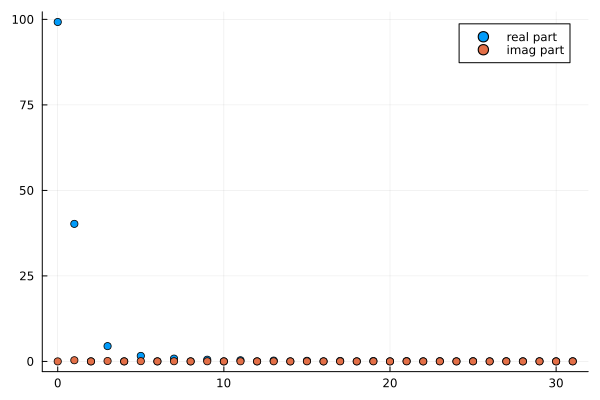

In [2]:
f = x -> (@. abs(x));
#f = x -> (@. sign(x));
#f = x -> (@. sin(x) + 3cos(x));
#f = x -> (@. exp(x))
#f = x -> (@. exp(3x))
#f = x -> (@. exp(3im * x))

f_X = f(X);


N = size(X,1)
ni = fftshift(rfftfreq(N))*N

F_f = rfft(f_X)

scatter(ni, real.(F_f), label = "real part")
scatter!(ni, imag.(F_f), label = "imag part")

## Exercise 5.

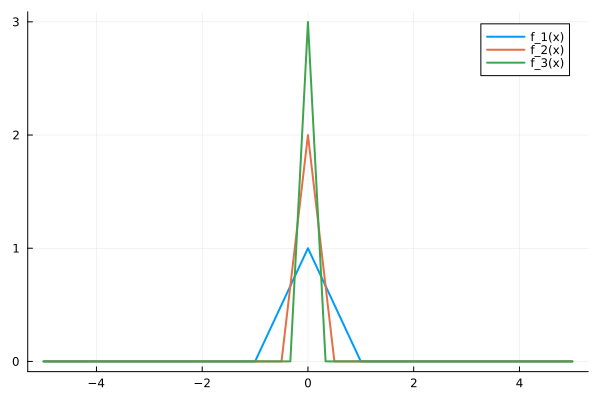

In [9]:
function delta_seq(x,mu,w)
    if x > mu - 1/w && x <= mu
        return (x-mu+1/w)*w^2
    elseif x > mu && x < mu + 1/w
        return -(x-mu-1/w)*w^2
    else
        return 0
    end
end

a = 0.0
f1(x) = delta_seq(x,a,1)
f2(x) = delta_seq(x,a,2)
f3(x) = delta_seq(x,a,3)
f6(x) = delta_seq(x,a,6)
f9(x) = delta_seq(x,a,9)
f18(x) = delta_seq(x,a,18)
plot(f1, label="f_1(x)", linewidth=2)
plot!(f2, label="f_2(x)", linewidth=2)
plot!(f3, label="f_3(x)", linewidth=2)

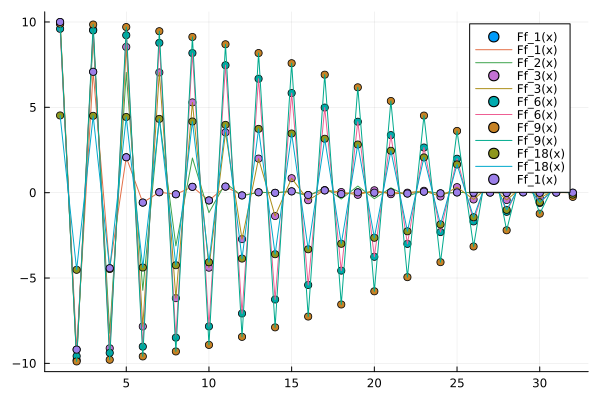

In [11]:
scatter(real.(rfft(f1.(X))), label="Ff_1(x)")
plot!(real.(rfft(f1.(X))), label="Ff_1(x)")
plot!(real.(rfft(f2.(X))), label="Ff_2(x)")
scatter!(real.(rfft(f3.(X))), label="Ff_3(x)")
plot!(real.(rfft(f3.(X))), label="Ff_3(x)")
scatter!(real.(rfft(f6.(X))), label="Ff_6(x)")
plot!(real.(rfft(f6.(X))), label="Ff_6(x)")
scatter!(real.(rfft(f9.(X))), label="Ff_9(x)")
plot!(real.(rfft(f9.(X))), label="Ff_9(x)")
scatter!(real.(rfft(f18.(X))), label="Ff_18(x)")
plot!(real.(rfft(f18.(X))), label="Ff_18(x)")
scatter!(real.(rfft(f1.(X))), label="Ff_1(x)")

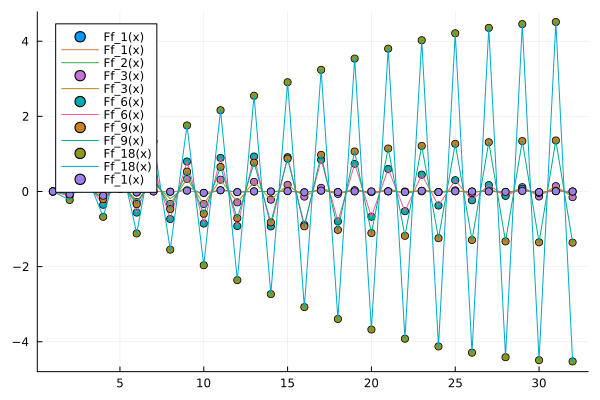

In [12]:
scatter(imag.(rfft(f1.(X))), label="Ff_1(x)")
plot!(imag.(rfft(f1.(X))), label="Ff_1(x)")
plot!(imag.(rfft(f2.(X))), label="Ff_2(x)")
scatter!(imag.(rfft(f3.(X))), label="Ff_3(x)")
plot!(imag.(rfft(f3.(X))), label="Ff_3(x)")
scatter!(imag.(rfft(f6.(X))), label="Ff_6(x)")
plot!(imag.(rfft(f6.(X))), label="Ff_6(x)")
scatter!(imag.(rfft(f9.(X))), label="Ff_9(x)")
plot!(imag.(rfft(f9.(X))), label="Ff_9(x)")
scatter!(imag.(rfft(f18.(X))), label="Ff_18(x)")
plot!(imag.(rfft(f18.(X))), label="Ff_18(x)")
scatter!(imag.(rfft(f1.(X))), label="Ff_1(x)")